In [10]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [11]:
df = pd.read_csv("../datasets/titanic.csv", usecols=["Age", "Fare", "Survived"])

In [12]:
df.sample(5)

,Survived,Age,Fare
546,1,19.0,26.000
260,0,NaN,7.750
204,1,18.0,8.050
49,0,18.0,17.800
392,0,28.0,7.925


In [13]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [14]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [15]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Survived"]),
    df["Survived"],
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 2), (179, 2), (712,), (179,))

Text(0.5, 1.0, 'Age QQ Plot')

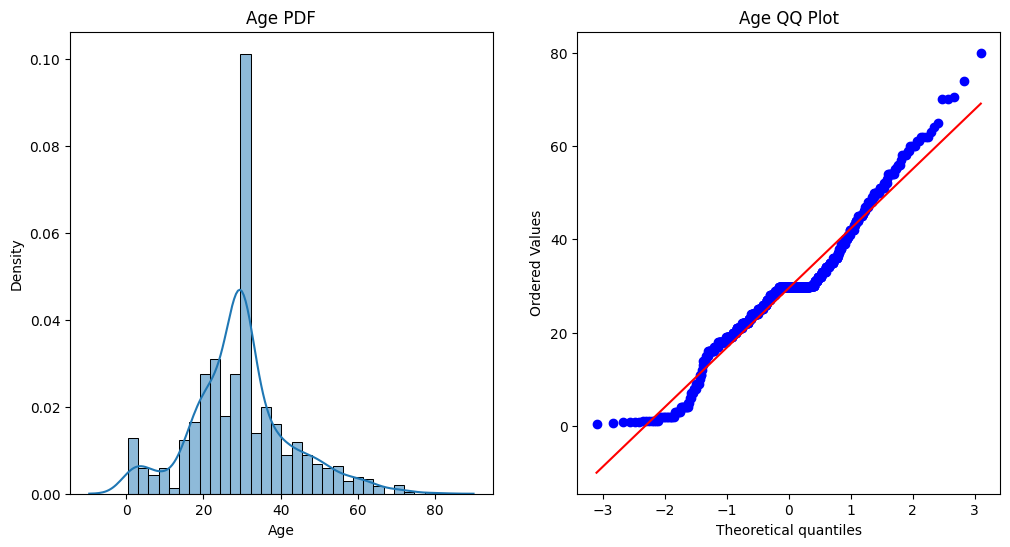

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.set_title("Age PDF")
sns.histplot(df["Age"], kde=True, stat="density", kde_kws=dict(cut=3), ax=ax1)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

Text(0.5, 1.0, 'Fare QQ Plot')

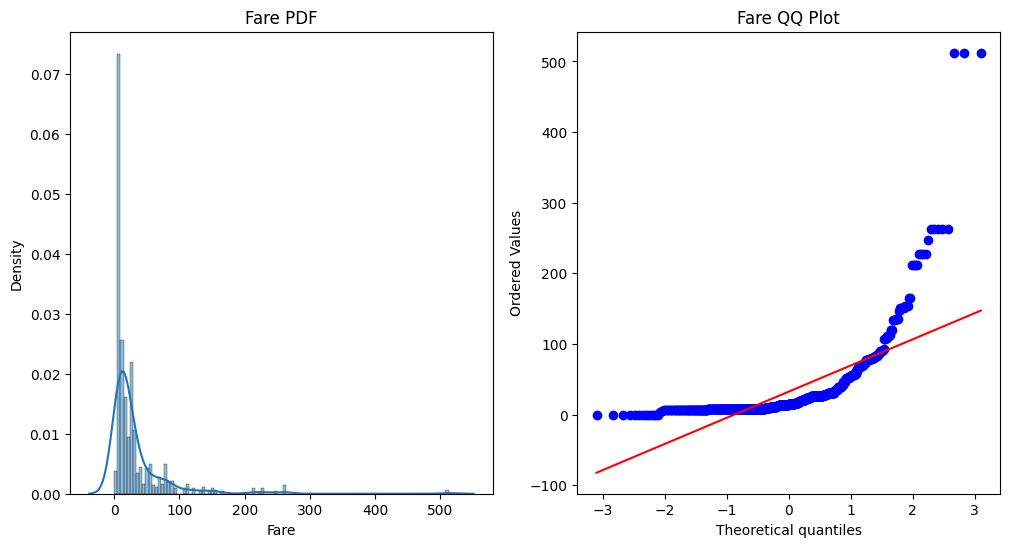

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.set_title("Fare PDF")
sns.histplot(df["Fare"], kde=True, stat="density", kde_kws=dict(cut=3), ax=ax1)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

In [44]:
clf_lr = LogisticRegression()
clf_dt = DecisionTreeClassifier()

In [46]:
clf_lr.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)
y_pred_dt = clf_dt.predict(X_test)

print(f"Accuracy of Logistic Regression Model: {accuracy_score(y_test, y_pred_lr)}")
print(f"Accuracy of Decision Tree Model      : {accuracy_score(y_test, y_pred_dt)}")

Accuracy of Logistic Regression Model: 0.6480446927374302
Accuracy of Decision Tree Model      : 0.6536312849162011


In [47]:
trf = FunctionTransformer(func=np.log1p)

In [48]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed  = trf.transform(X_test)

In [49]:
clf_lr = LogisticRegression()
clf_dt = DecisionTreeClassifier()

clf_lr.fit(X_train_transformed, y_train)
clf_dt.fit(X_train_transformed, y_train)

y_pred_lr = clf_lr.predict(X_test_transformed)
y_pred_dt = clf_dt.predict(X_test_transformed)

print(f"Accuracy of Logistic Regression Model: {accuracy_score(y_test, y_pred_lr)}")
print(f"Accuracy of Decision Tree Model      : {accuracy_score(y_test, y_pred_dt)}")

Accuracy of Logistic Regression Model: 0.6815642458100558
Accuracy of Decision Tree Model      : 0.6703910614525139


In [52]:
X_transformed = trf.fit_transform(df.drop(columns=["Survived"]))

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, df["Survived"], scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, df["Survived"], scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6621847690387016


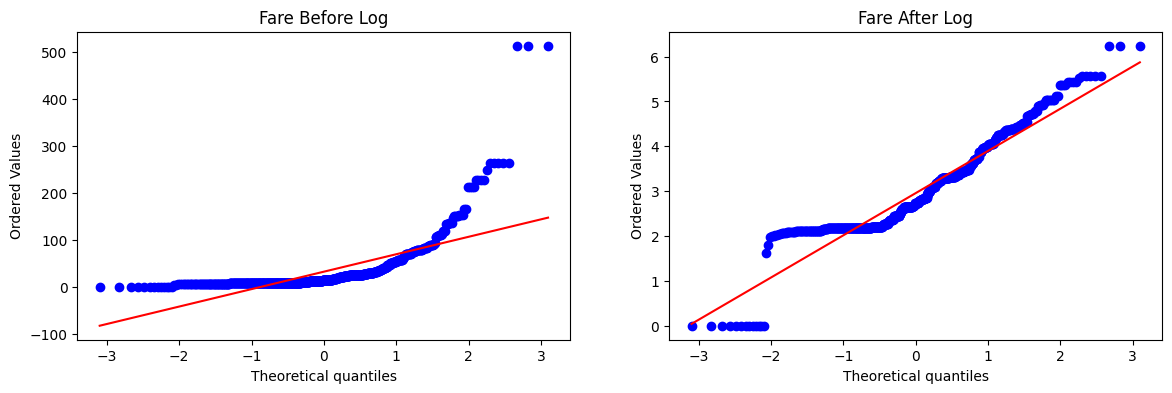

In [54]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()


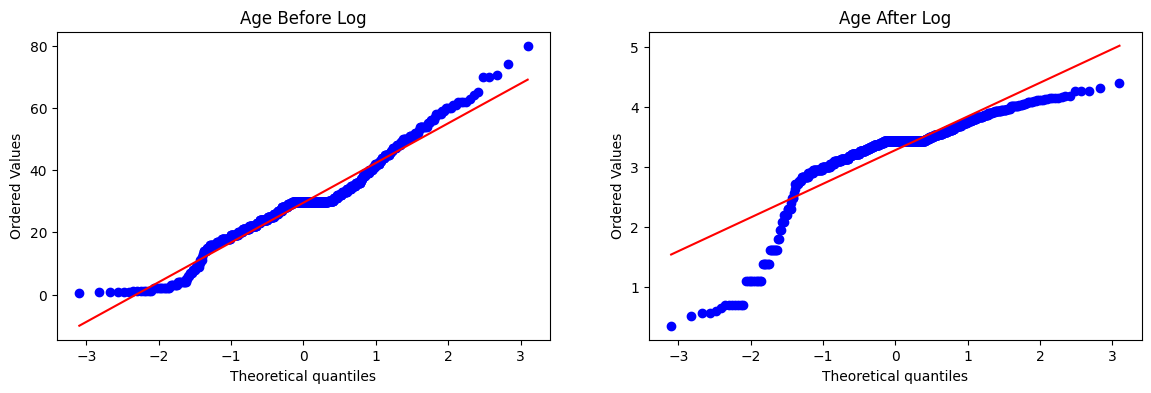

In [55]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [56]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [57]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [58]:
X_transformed2 = trf2.fit_transform(df.drop(columns=["Survived"]))

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,df["Survived"],scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,df["Survived"],scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6610861423220974
